### Classification

Output variable $y$ can only take on a limited range of outputs.  

Classic classification problems:
* Spam filter
* Fraud detection in transactions (fintech)
* Tumore classification (malignant or not)  

**Binary Classification** refers to there being only two *classes* or *binaries*.

### Logistic Regression

One of the most widely used ML algorithms

The **Sigmoid function** or **Logistic function**:
* Function in the shape of an 'S'
* Always outputs values between 0 and 1
* Can be written as $\frac{1}{1 + e^{-z}}$ where $ 0<g(z)<1$
* When $z$ is large $g(z)$ becomes very close to 1 and when $z$ is a large negative number $g(z)$ becomes very close to 0
* When $z$ is exactly 1 then $g(z) = 0.5$  


$z = \vec{w}\cdot\vec{x} + b$ which is the same as $f_{\vec{w},b}(\vec{x})$  

Then plug this into $\frac{1}{1 + e^{-z}}$, this equivalently gives $f_{\vec{w},b}(\vec{x}) = g(\vec{w}\cdot\vec{x} + b)$, therefore:  

$$\frac{1}{1 + e^{-(\vec{w}\cdot\vec{x} + b)}}$$

If you run the model for tumor classification and you get $f_{\vec{w},b}(\vec{x}) = 0.7$ that means the model is predicting there is a 70% chance that y = 1. That also means that there is a 30% chance that y = 0.

In [16]:
# Example code of the sigmoid function
import numpy as np
import matplotlib.pyplot as plt

input_array = np.array([1,2,3])
exp_array = np.exp(input_array)
print(f"Input array:, {input_array}")
print(f"Exponent array:, {exp_array}")

Input array:, [1 2 3]
Exponent array:, [ 2.718  7.389 20.086]


In [17]:
def sigmoid(z):
    # Compute the sigmoid of z
    # Args: z (ndarray): A scalar, numpy array of any size
    # Returns g (ndarray): sigmoid(z), with the same shape as z

    g = 1/(1+np.exp(-z))
    return g

In [18]:
# Generate an evenly spaced array of values between -10 and 10

z_tmp = np.arange(-10,11)
y = sigmoid(z_tmp)

# Pretty printing two arrays
np.set_printoptions(precision=3)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


Text(0.5, 0, 'z')

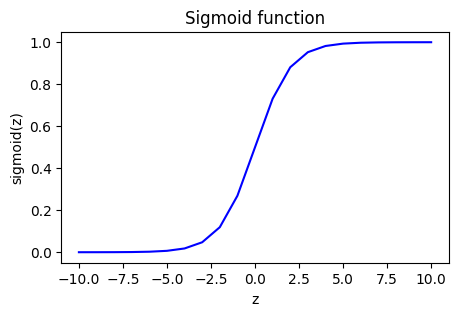

In [19]:
# PLotting with Matplotlib
fig, ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp,y,c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel("sigmoid(z)")
ax.set_xlabel("z")


### Decision Boundary

What if you want to predict of y = 1 or 0.  

Then you have to pick a *threshold* e.g. less than 0.5 is 0 and more than 0.5 is 1.  

Where is $f_{\vec{w},b}(\vec{x}) >= 0.5$?, when $g(z) >= 0.5, when $z>=0$ and therefore, $\vec{w}\cdot\vec{x} + b >= 0$

For an example that has two features $x_1$ and $x_2$ we have that $f_{\vec{w},b}(\vec{x}) = g(z) = g(w_1x_1 + w_2x_2 + b)$

**The decision boundary is what you want to look at**. This is where $z = \vec{w}\cdot\vec{x} + b = 0$  

For *non-linear* decision boundaries:  

$z = w_1x_1^2 + w_2x_2^2 + b$, if we let $w_1$ and $w_2$ equal to 1 and $b$ equal to -1, then the **decision boundary** will be written as:



$$z = x_1^2 + x_2^2 - 1 = 0$$

therefore  
$$x_1^2 + x_2^2 = 1$$

is the function of the decision boundary.

### Loss & Cost function for logistic regression

***Reminder*: The cost function gives you a way to measure how well a specific set of parameters fit the training data, thereby gives you a way to choose better parameters**.

A example has $i$ training examples $j$ number of features:

Plotting the cost function $$J(\vec{w},b) = \frac{1}{m} \sum_{i=1}^{m}\frac{1}{2}(f_{\vec{w},b}(x^i)-y^i)$$  

where $$f_{\vec{w},b}(\vec{x}) = \frac{1}{1 + e^{-(\vec{w}\cdot\vec{x} + b)}}$$  

will give you a **non-convex** function. There can actually be lots of local minima (too much!).

**For logistic regression we wil have**:  

We can say the *Loss function* can be donated as $\frac{1}{2}(f_{\vec{w},b}(x^i)-y^i)$, and can be said that it is equal to half of the squared difference.  

The loss function can be set as:  

$-log(f_{\vec{w},b}(\vec{x}^i))$ if $y^i = 1$, and $-log(1-f_{\vec{w},b}(\vec{x}^i))$ if $y^i = 0$  

The loss will be the **lowest** when $f_{\vec{w},b}(x^i)$ predicts close to the true label $y^i$   

The further prediction $f_{\vec{w},b}(x^i)$ is from the target $y^i$, the **higher** the loss

*Loss* is a measure of difference of a single example to its target value, while *cost* is the measure of losses over the training set.  

The entire loss function can be written as:  

$$f_{\vec{w},b}(\vec{x}^i,y^i) = -(y^i)log(f_{\vec{w},b}(\vec{x}^i)) - (1-y^i)log(1-f_{\vec{w},b}(\vec{x}^i))$$
 
This works because depending on the value of $y$ (either 1 or 0), this will cancel out the additional term and you will be left with the original loss function we defined above.

**Now, writing out ths cost function:**  

$$J(\vec{w},b) = -\frac{1}{m}\sum_{i=1}^{m}[(y^i)log(f_{\vec{w},b}(\vec{x}^i)) + (1-y^i)log(1-f_{\vec{w},b}(\vec{x}^i))]$$

Why do we choose this specific function? It is derived from an idea in statistics called *"maximum likelyhood estimation"*, which is an idea in statistics how to efficiently find parameters for models.

### Code implementation

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Dataset
X_train = np.array([[0.5, 1.5],[1, 1],[1.5, 0.5],[3, 0.5],[2, 2],[1, 2.5]]) #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])

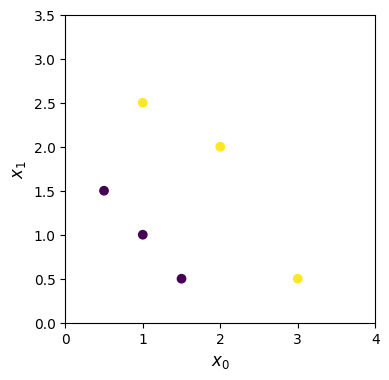

In [22]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

In [23]:
def compute_logistic_cost(X, y, w, b):

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        zi = np.dot(X[i],w)+b
        fxy = sigmoid(zi)
        cost += -y[i]*np.log(fxy)+(1-y[i])*np.log(1-fxy)
        
    cost = cost/(-m)

### Gradient descent implementation for logistic regression

**Reminder**: Gradient descent is used to minimize the cost function.  

Similarly to gradient descent for linear regression. Carry out the updates simultaneously. The equations for gradient descent is the same, the only change is $f_{(\vec{w},b)}(\vec{x}^i)$ is different. As for logistic regression this is the sigmoid function:

Gradient Descent:  

$$w_j = w_j - \alpha \frac{\partial }{\partial w_j}J(\vec{w},b)$$
and $$b = b - \alpha \frac{\partial }{\partial b}J(\vec{w},b)$$
where  

$$\frac{\partial }{\partial w_j}J(w,b) = \frac{1}{m}\sum_{i=1}^{m}(f_{\vec{w},b}(\vec{x}^i)-y^i)x_j^i$$

and  
$$\frac{\partial }{\partial wb}J(w,b) = \frac{1}{m}\sum_{i=1}^{m}(f_{\vec{w},b}(\vec{x}^i)-y^i)$$

Remember 

$$f_{(\vec{w},b)}(\vec{x}^i) = \frac{1}{1 + e^{-(\vec{w}\cdot\vec{x} + b)}}$$

### Logistic Regression using Scikit-Learn

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print("Prediction on training set:", y_pred)
print("Accuracy on training set:", lr_model.score(X,y))

Prediction on training set: [0.008 0.019 0.03  0.91  1.169 0.865]
Accuracy on training set: 0.962406015037594


### The problem of **Overfitting** and **Underfitting**

Firstly, **underfitting** is when an algorithm does not fit the data very well. Another term used to describe this is to say that the algorithm has **high bias**.

**Generalization** is when you want your algorithm to do well on data that is not even in the training set. You want the algorithm to *generalize* well even on data it has never seen before.

**Overfitting** is when the algorithm starts to follow the data exactly. When looking at a plot, you can see the plotted algorithm goes exactly through all the training data points. In such a case the model will not *generalize* very well. Another term used to describe this is to say that the algorithm has **high variance**.

**NOTE**: <u>Overfitting happens frequently with using higher order polynomials to try and fit to your training data perfectly<u>

The term **high variance** comes from the fact that this algorithm could change completely even with small changes in the training set. Therefore, for example if two engineers had two slightly altered versions of the same training set, they would end up with completely different algorithms and therefore completely different predictions.

### Addressing Overfitting

Ways to address overfitting:
* Collecting more training examples - With the larger training set, the algorithm is likely to overfit less
* See if you can use fewer features $(x_i)$ - If you have many features but little training data it is likely to overfit
    * Choose the most appropriate features (feature selection)
    * This can be disadvantageous as you may be throwing away information
* Regularization: Reduce the impact of the features by reducing the size of parameters $w_j$


### Cost function with *Regularization*

Let's say you have a higher order polynomial (4th order) and you want to make $w_3$ and $w_4$ small, then you would add:
$$(Cost function) + 1000w_3 + 1000w_4$$

This then penalizes the cost function and then it will have to find small values for $w_3$ and $w_4$ to try to minimize the *Cost function*.

Therefore, you end up with $w_3$ and $w_4$ being very close to zero. Nearly cancelling them out and "getting rid" of these terms. You would then end up with a function that is closer to a quadratic function.  

In real life however, you have $w_j$ features. Therefore, *Regularization* is generally implemented to penalize all features or more precisely all the $w_j$ parameters. This usually results in a smoother model that is not prone to overfitting.

Then you would do the following:  
$$Cost function + \frac{\lambda}{2m}\sum_{j=1}^{n}w_j^2$$

**NOTE**: We divide by $2m$ such that when your training set scales, the same value of $\lambda$ should work!  

Where $\lambda$ is the **Regularization** parameter. Similar to picking a learning rate, you would also have to choose this parameter. We also do not penalize the value $b$ as it makes little difference.

What different values of lambda do:
* For a small lambda, say 0, **it will overfit** your data as the regularization term is 0.
* For s big lambda, you will put a big weight on the regularization term. This makes almost all values $(w_j)$ close to zero. And you will be left with $f(x)=b$ and the learning algorithms fits a straight line. **It will underfit.**

### Regularized Linear Regression

The gradient descent expression of $w_j$ changes to:  
$$\frac{\partial }{\partial w_j}J(w,b) = \frac{1}{m}\sum_{i=1}^{m}(f_{\vec{w},b}(\vec{x}^i)-y^i)x_j^i + \frac{\lambda}{m}w_j$$

It gets the last term added. For $\frac{\partial }{\partial wb}J(w,b)$ it stays the same. Remember we do not regularize $b$, therefore it stays the same.

When you multiply the terms out you get the following:  
$$w_j = w_j(1-\alpha\frac{\lambda}{m}) - \alpha \frac{\partial }{\partial w_j}J(\vec{w},b)$$

As you can see the last part is just the *regular term*. For the first term:  

We have $\alpha$ being a very small number, say 0.01 and $\lambda$ also being a relatively small number, say 1, and m is say, 50. Then you have the first term being an **very small positive number**:  
$$w_j(1-\alpha\frac{\lambda}{m}) = w_j(1-0.0002) = w_j(0.9998)

Therefore the effect of this term is that for every iteration of gradient descent you take $w_j$ and multiply it with some number slightly smaller than 1. Therefore Regularization then shrinks the value of $w_j$ on each iteration.

### Regularized Logistic Regression

Similar to Linear regression, you have the *Cost function* being:
$$Cost function +  \frac{\lambda}{2m}\sum_{j=1}^{n}w_j^2$$

Then *Gradient descent* will look like the following:  
$$w_j = w_j(1-\alpha\frac{\lambda}{m}) - \alpha \frac{\partial }{\partial w_j}J(\vec{w},b)$$

Which is exactly the same as for Linear Regression.

### Implementing Regularization in the Cost and Gradient functions:

In [25]:
def compute_cost_linear_reg(X,y,w,b,lambda_=1):
    m = X.shape[0]
    n = len(w)
    cost = 0

    for i in range(m):
        f_wb_i = np.dot(X,w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/(2*m)

    reg_cost = 0
    for j in range(n):
        reg_cost = (w[j])**2
    reg_cost = (lambda_/(2*m))*reg_cost

    total_cost = cost + reg_cost

    return total_cost

In [26]:
def compute_cost_logistic_reg(X,y,w,b,lambda_=1):


    m = X.shape[0]
    n = len(w)
    cost = 0

    for i in range(m):
        z_i = np.dot(X[i],w)+b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i)-(1-y[i])*np.log(f_wb_i)
    cost = cost/(m)

    reg_cost = 0
    for j in range(n):
        reg_cost = (w[j])**2
    reg_cost = (lambda_/(2*m))*reg_cost

    total_cost = cost + reg_cost
    return total_cost

In [29]:
def compute_gradient_linear_reg(X,y,w,b,lambda_):
    
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i],w)+b) -y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*X[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m)*w[j]
    
    return dj_db, dj_dw


In [31]:
def compute_gradient_logistic_reg(X,y,w,b,lambda_):
    
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w)+b)
        err = f_wb_i-y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j]+ err*X[i,j]
        dj_db = dj_db+ err
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    for j in range(n):
        dj_dw[j] = dj_dw[j]+(lambda_/m)*w[j]

    return dj_db, dj_dw